# JHU Sibley Hospital Phantom Scanning Test Protocol

## Background and Motivation
Our simulation work has shown that adult-trained deep learning denoisers perform poorly when used on pediatric-sized patients with pediatric protocols. 1 A key contributor to this reduced performance was that the lower spatial frequency noise textures in pediatric protocols, due to their smaller FOV-size, were not present in the adult-trained denoising model’s training dataset. A follow-up study then found that by sampling noise textures from pediatric protocol phantom scans could be incorporated into model training via data augmentation techniques to regain performance in pediatric-sized patients.
The goal of this present study is to validate these (2) simulated findings using physical phantom scans on clinical scanners:

1. Deep learning denoising models trained on adult patient data perform well on adult-sized (large reconstructed FOVs) but poorly on pediatric (abdomen) protocol images with small body-fitting ROIs
2. Models trained with noise texture augmentation (described above) maintain more consistent denoising performance across patient and FOV size compared to baseline models

Performance will be assessing using objective measures of image quality described in the IEC CT Acceptance Testing standard,2 task-based assessment of low contrast detectability,3 and assessments of pediatric size-based generalizability.1
Physicist Dr. Tom Hrinivich at Sibley Hospital Proton Center, a collaborator on Rongping Zeng’s RO1 will be assisting us in performing phantom scans to validate some of our denoising methods.
The proposed testing protocol aims to reproduce the acquisition and reconstruction parameters used in constructing the Low-dose CT Grand Challenge Dataset (described in further detail below) while also adding different reconstructed fields of view reflective of the differences that exist between adult and pediatric CT protocols (details of reference adult and pediatric chest protocols are provided below as well).


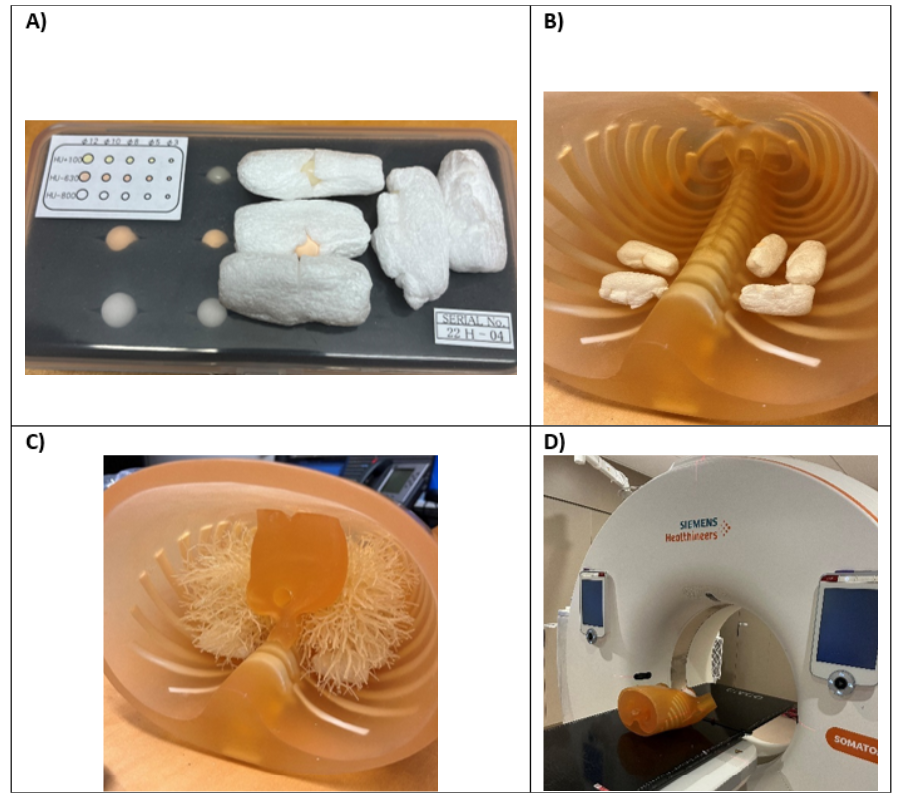

In [3]:
!ls /gpfs_projects/brandon.nelson/PediatricCTSizeDataAugmentation/Sibley\ Hospital\ Data/ACR464

'FullMAs1  1.0  Br32_150mm'  'HighMAs  1.0  Qr43_150mm'
'FullMAs1  1.0  Br32_250mm'  'HighMAs  1.0  Qr43_250mm'
'FullMAs1  1.0  Br32_380mm'  'HighMAs  1.0  Qr43_380mm'
'FullMAs1  1.0  Qr43_150mm'  'QuarterMAs1  1.0  Br32_150mm'
'FullMAs1  1.0  Qr43_250mm'  'QuarterMAs1  1.0  Br32_250mm'
'FullMAs1  1.0  Qr43_380mm'  'QuarterMAs1  1.0  Br32_380mm'
'FullMAs2  1.0  Br32_150mm'  'QuarterMAs1  1.0  Qr43_150mm'
'FullMAs2  1.0  Br32_250mm'  'QuarterMAs1  1.0  Qr43_250mm'
'FullMAs2  1.0  Br32_380mm'  'QuarterMAs1  1.0  Qr43_380mm'
'FullMAs2  1.0  Qr43_150mm'  'QuarterMAs2  1.0  Br32_150mm'
'FullMAs2  1.0  Qr43_250mm'  'QuarterMAs2  1.0  Br32_250mm'
'FullMAs2  1.0  Qr43_380mm'  'QuarterMAs2  1.0  Br32_380mm'
'FullMAs3  1.0  Br32_150mm'  'QuarterMAs2  1.0  Qr43_150mm'
'FullMAs3  1.0  Br32_250mm'  'QuarterMAs2  1.0  Qr43_250mm'
'FullMAs3  1.0  Br32_380mm'  'QuarterMAs2  1.0  Qr43_380mm'
'FullMAs3  1.0  Qr43_150mm'  'QuarterMAs3  1.0  Br32_150mm'
'FullMAs3  1.0  Qr43_250mm'  'QuarterMAs3  1.0  Br32

Start by organizing the data into a database to make it easier to work with

In [7]:
!tree -d /gpfs_projects/brandon.nelson/PediatricCTSizeDataAugmentation/CCT189_peds/

/gpfs_projects/brandon.nelson/PediatricCTSizeDataAugmentation/CCT189_peds/
├── diameter112mm
│   ├── signal_absent
│   │   ├── dose_010
│   │   │   ├── fbp
│   │   │   ├── RED-CNN
│   │   │   └── RED-CNN augmented
│   │   ├── dose_025
│   │   │   ├── fbp
│   │   │   ├── RED-CNN
│   │   │   └── RED-CNN augmented
│   │   ├── dose_040
│   │   │   ├── fbp
│   │   │   ├── RED-CNN
│   │   │   └── RED-CNN augmented
│   │   ├── dose_055
│   │   │   ├── fbp
│   │   │   ├── RED-CNN
│   │   │   └── RED-CNN augmented
│   │   ├── dose_070
│   │   │   ├── fbp
│   │   │   ├── RED-CNN
│   │   │   └── RED-CNN augmented
│   │   ├── dose_085
│   │   │   ├── fbp
│   │   │   ├── RED-CNN
│   │   │   └── RED-CNN augmented
│   │   └── dose_100
│   │       ├── fbp
│   │       ├── RED-CNN
│   │       └── RED-CNN augmented
│   └── signal_present
│       ├── dose_010
│       │   ├── fbp
│       │   ├── RED-CNN
│       │   └── RED-CNN augmented
│       ├── dose_025
│       │   ├── fbp
│       │   ├── RED-CNN
│    

In [8]:
!tree --help

usage: tree [-acdfghilnpqrstuvxACDFJQNSUX] [-H baseHREF] [-T title ]
	[-L level [-R]] [-P pattern] [-I pattern] [-o filename] [--version]
	[--help] [--inodes] [--device] [--noreport] [--nolinks] [--dirsfirst]
	[--charset charset] [--filelimit[=]#] [--si] [--timefmt[=]<f>]
	[--sort[=]<name>] [--matchdirs] [--ignore-case] [--fromfile] [--]
	[<directory list>]
  ------- Listing options -------
  -a            All files are listed.
  -d            List directories only.
  -l            Follow symbolic links like directories.
  -f            Print the full path prefix for each file.
  -x            Stay on current filesystem only.
  -L level      Descend only level directories deep.
  -R            Rerun tree when max dir level reached.
  -P pattern    List only those files that match the pattern given.
  -I pattern    Do not list files that match the given pattern.
  --ignore-case Ignore case when pattern matching.
  --matchdirs   Include directory names in -P pattern matching.
  --norepor